In [2]:
#Source code untuk mengimport package yang dibutuhkan
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Source code untuk import data
irisdata = pd.read_csv('iris.csv')

In [4]:
#Source code untuk menampilkan 5 data teratas 
irisdata.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Source code untuk melihat struktur data
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Source code untuk mengetahui jumlah masing-masing kelas
irisdata['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

## Eksplorasi Data

In [8]:
#Source code untuk statistika deskriptif
irisdata.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


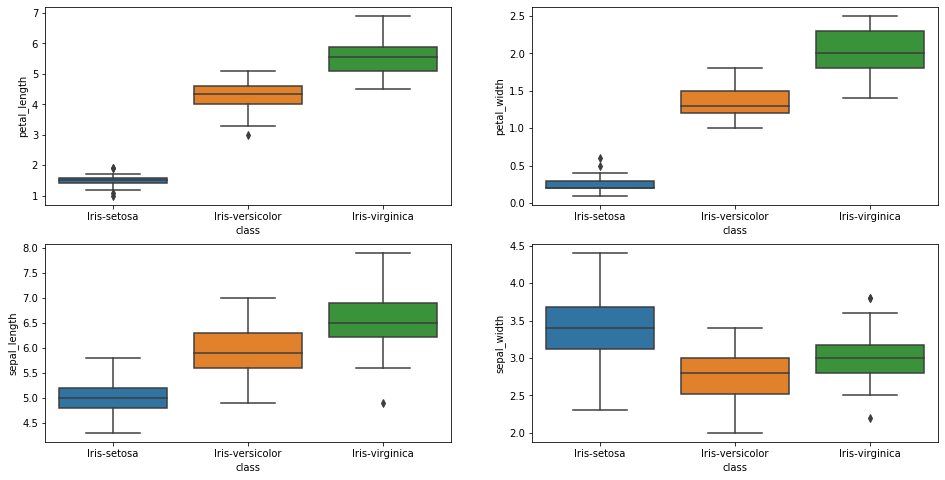

In [12]:
#Source code untuk menampilkan boxplot untuk masing-masing feature tiap kelas
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x="class", y="petal_length", data=irisdata)
plt.subplot(2, 2, 2)
sns.boxplot(x="class", y="petal_width", data=irisdata)
plt.subplot(2, 2, 3)
sns.boxplot(x="class", y="sepal_length", data=irisdata)
plt.subplot(2, 2, 4)
sns.boxplot(x="class", y="sepal_width", data=irisdata)

C:\Users\Windows 10\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


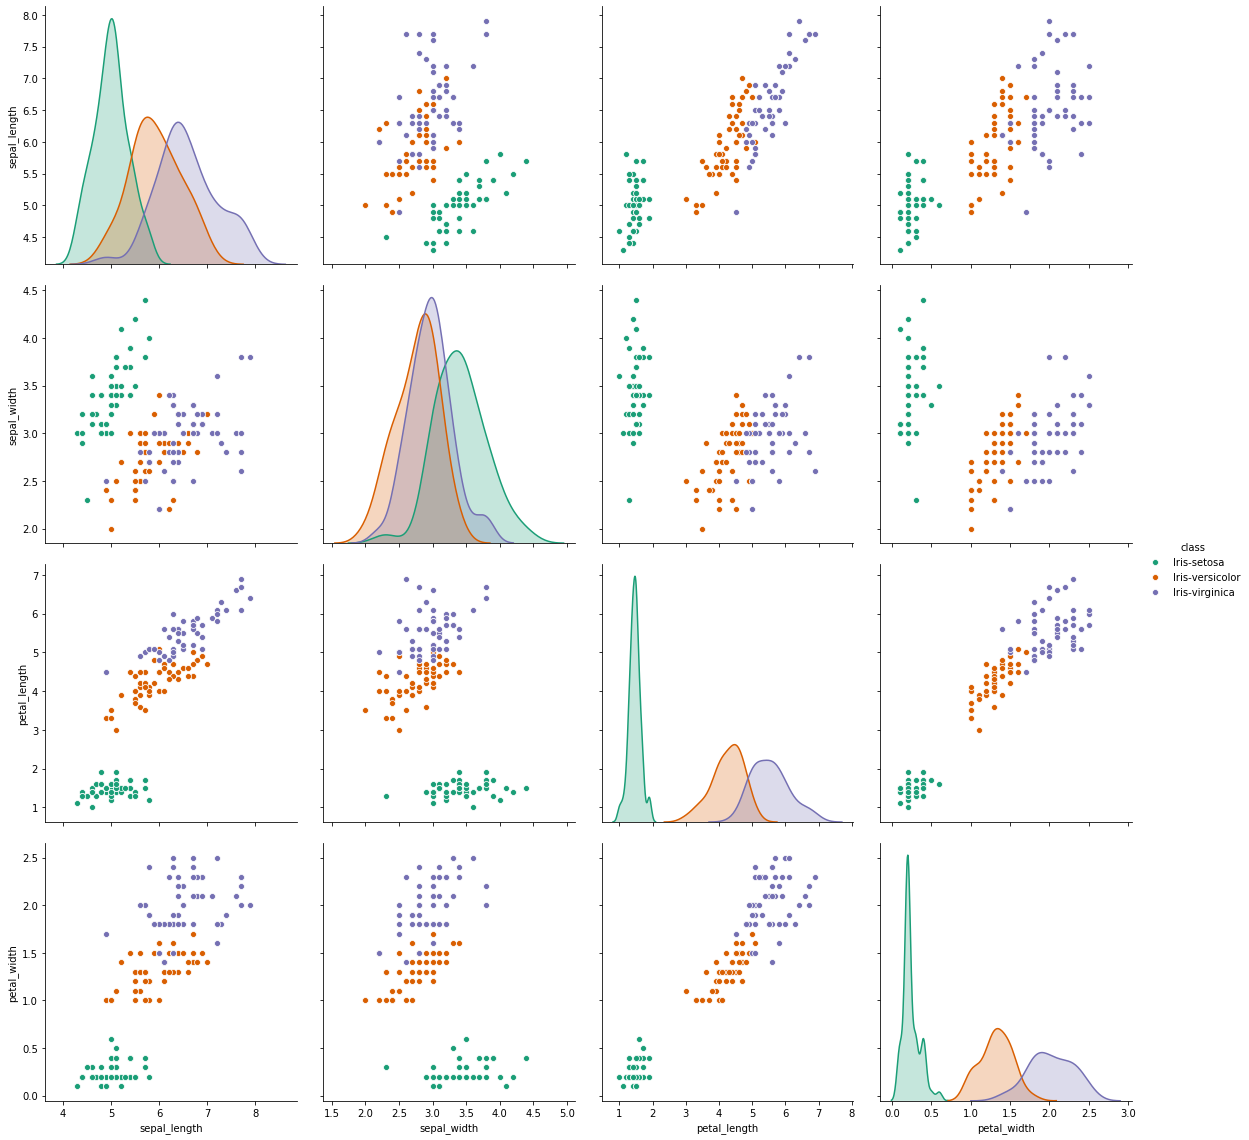

In [14]:
#Source code untuk menampilkan matrix scatterplot
sns.pairplot(irisdata,hue='class',palette='Dark2', size=4)

## Analisis Data Menggunakan SVM

In [15]:
# Memisahkan feature dan kelas
X = irisdata.drop('class', axis=1)  
y = irisdata['class']  

In [16]:
##Source code untuk mencoba berbagai kernel
kernels = ['Polynomial', 'RBF', 'Sigmoid', 'linear']

def getClassifier(ktype):
    if ktype == 0:
        # Polynomial
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear
        return SVC(kernel='linear', gamma="auto")

In [17]:
for i in range(4):
    # Memisahkan data menjadi data training dan testing (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

    # Membuat model SVM dengan kernel yang berbeda
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)

    # Membuat prediction
    y_pred = svclassifier.predict(X_test)  

    # Performansi model masing-masing kernel
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred)) 

Evaluation: Polynomial kernel
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Evaluation: RBF kernel
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Evaluation: Sigmoid kernel
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        11
I

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Plot masing-masing kernel
Untuk membuat plot 2D hanya bisa menggunakan 2 feature, maka yang dipilih adalah "petal_lenght" dan "sepal_lenght"

In [43]:
#source code untuk membuat kode class menjadi 0,1,2
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
irisdata['class'] = labelencoder.fit_transform(irisdata['class'])
irisdata

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
#source code untuk memilih 2 feature yaitu "petal_lenght" dan "sepal_lenght"
X=irisdata[['sepal_length', 'sepal_width']].to_numpy() 
y=irisdata[['class']].to_numpy()

In [47]:
y = y.flatten()

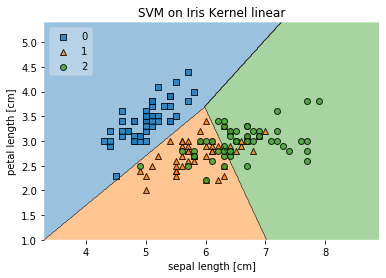

In [53]:
from mlxtend.plotting import plot_decision_regions
#Source code untuk menampilkan Plot Kernel Liniear
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)

plot_decision_regions(X, y, clf=svm, legend=2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris Kernel linear')
plt.show()

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


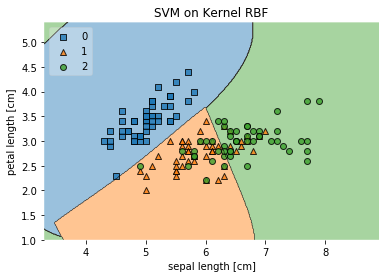

In [54]:
#Source code untuk menampilkan Plot Kernel RBF
svm = SVC(C=0.5, kernel='rbf')
svm.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Kernel RBF')
plt.show()


C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


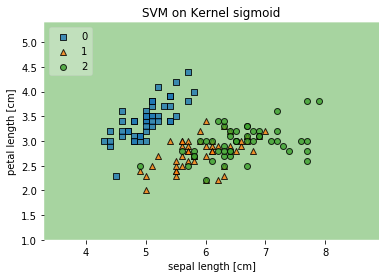

In [56]:
#Source code untuk menampilkan Plot Kernel Sigmoid
svm = SVC(C=0.5, kernel='sigmoid')
svm.fit(X, y)

plot_decision_regions(X, y, clf=svm, legend=2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Kernel sigmoid')
plt.show()

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


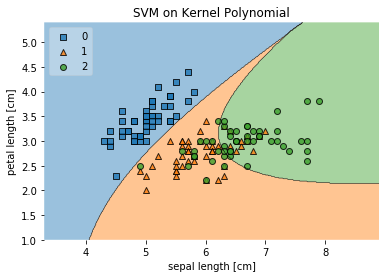

In [57]:
# Source code untuk menampilkan Kernel Polynomial
svm = SVC(C=0.5, kernel='poly')
svm.fit(X, y)
plot_decision_regions(X, y, clf=svm, legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Kernel Polynomial')
plt.show()

## Model Selection Menggunakan Metode GridSearch

In [18]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Percobaan untuk berbagai Kernel, Parameter C dan Gamma

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [59]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .

[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    1.0s finished
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [60]:
print(grid.best_estimator_) 

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [61]:
grid_predictions = grid.predict(X_test)

In [62]:
print(confusion_matrix(y_test,grid_predictions))

[[13  0  0]
 [ 0  8  0]
 [ 0  1  8]]


In [63]:
#menampilkan performansi model terbaik
print(classification_report(y_test,grid_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



#### Reference
https://github.com/clareyan/SVM-Hyper-parameter-Tuning-using-GridSearchCV

https://github.com/okkymabruri/data-analysis-projects/tree/master/EDA-iris